In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os
import pandas_datareader.data as web
from pandas_datareader.famafrench import get_available_datasets
import datetime

from arch import arch_model
from statsmodels.tsa.stattools import acf, pacf

In [2]:
datasets = get_available_datasets()
print('No. of datasets:{0}'.format(len(datasets)))
# datasets #comment out if you want to see all the datasets

No. of datasets:297


In [3]:
ls_10_industry = [dataset for dataset in datasets if '10' in dataset and 'Industry' in dataset]
print(ls_10_industry)
dict_industry_m = web.DataReader(ls_10_industry[0],'famafrench',start='1963-07-01',end='2020-12-01') # Taking [0] as extracting '10_Industry_Portfolios (Monthly)'
df_industry_m = dict_industry_m[0] # Extracting value-weighted
dict_industry_d = web.DataReader(ls_10_industry[2],'famafrench',start='1963-07-01',end='2020-12-01') # Taking [2] as extracting '10_Industry_Portfolios (Daily)'
df_industry_d = dict_industry_d[0] # Extracting value-weighted

['10_Industry_Portfolios', '10_Industry_Portfolios_Wout_Div', '10_Industry_Portfolios_daily']


In [4]:
ls_5_factor = [dataset for dataset in datasets if 'Factors' in dataset and '5' in dataset]
print(ls_5_factor)
dict_factor_m = web.DataReader(ls_5_factor[0],'famafrench',start='1963-07-01',end='2018-11-01') # Taking [0] as extracting 5 factor (Monthly)
df_factor_m = dict_factor_m[0]
dict_industry_d = web.DataReader(ls_5_factor[1],'famafrench',start='1963-07-01',end='2018-11-01') # Taking [1] as extracting 5 factor (Daily)
df_factor_d = dict_industry_d[0]

['F-F_Research_Data_5_Factors_2x3', 'F-F_Research_Data_5_Factors_2x3_daily', 'Developed_5_Factors', 'Developed_5_Factors_Daily', 'Developed_ex_US_5_Factors', 'Developed_ex_US_5_Factors_Daily', 'Europe_5_Factors', 'Europe_5_Factors_Daily', 'Japan_5_Factors', 'Japan_5_Factors_Daily', 'Asia_Pacific_ex_Japan_5_Factors', 'Asia_Pacific_ex_Japan_5_Factors_Daily', 'North_America_5_Factors', 'North_America_5_Factors_Daily', 'Emerging_5_Factors']


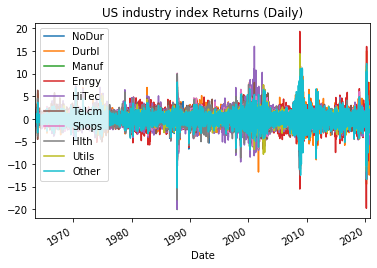

In [5]:
df_industry_d.plot(title='US industry index Returns (Daily)')

In [6]:
df_factor_d.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07-01,-0.67,0.00,-0.32,-0.01,0.15,0.012
1963-07-02,0.79,-0.27,0.27,-0.07,-0.19,0.012
1963-07-03,0.63,-0.17,-0.09,0.17,-0.33,0.012
1963-07-05,0.40,0.08,-0.28,0.08,-0.33,0.012
1963-07-08,-0.63,0.04,-0.18,-0.29,0.13,0.012


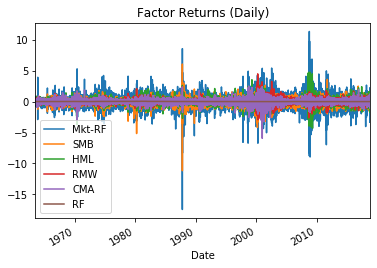

In [7]:
df_factor_d.plot(title='Factor Returns (Daily)')

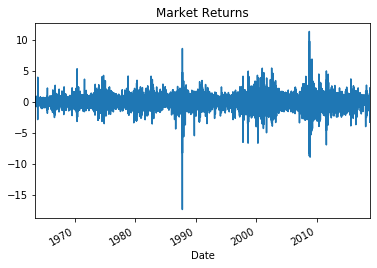

In [8]:
df_factor_d['MKT'] = df_factor_d['Mkt-RF'] + df_factor_d['RF']
ret = df_factor_d['MKT']
ret.plot(title='Market Returns')

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:660: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


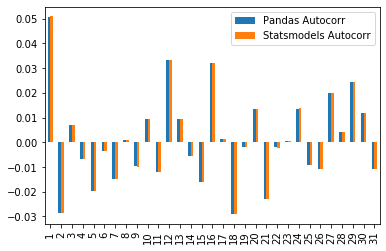

In [9]:
ret_acf_1 =  acf(ret)[1:32]
ret_acf_2 = [ret.autocorr(i) for i in range(1,32)]

test_df = pd.DataFrame([ret_acf_1, ret_acf_2]).T
test_df.columns = ['Pandas Autocorr', 'Statsmodels Autocorr']
test_df.index += 1
test_df.plot(kind='bar')

In [10]:
am = arch_model(ret) 
res = am.fit(update_freq=10)
print(res.summary())

Iteration:     10,   Func. Count:     67,   Neg. LLF: 16722.98738555449
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16722.980605118075
            Iterations: 13
            Function evaluations: 81
            Gradient evaluations: 13
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    MKT   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -16723.0
Distribution:                  Normal   AIC:                           33454.0
Method:            Maximum Likelihood   BIC:                           33484.1
                                        No. Observations:                13932
Date:                Thu, Dec 03 2020   Df Residuals:                    13928
Time:                        02:34:49   Df Model:                            4
       